<a href="https://colab.research.google.com/github/e-white25/Python_practice/blob/main/Genomics_Midterm_Spring2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Midterm Exam
#### You can look at your old notebooks and online cheatsheets.

### Question 1-2
You work at a startup that is trying to bioprospect human gut metagenomic data. They recently developed a DNA-based LLM and have generated a handful of sequences. They now want to determine whether these sequences are statistically distinguishable from naturally occurring data.

Run the cell below to download two datasets, one from AI generated sequences and one from real data.


In [ ]:
!gdown 124nJeiT7tNrI-YjZ4lNb8uUBmkKqZhRY
!gdown 1Okf8cEt2RU_kNvTUnkQx3hDiEE4SA5aE

## **Question 1:** Calculate the GC content distribution of both the naturally occurring sequences and the AI-generated sequences. (+20 points)


##Assessing FASTA file structures: *reworked/completed*

In [ ]:
### Look at the hints below if you wanna see a posible way to import a multifasta into a dictionary, incidently, you can also
## try to convert this into a table (using bash for example) and load it as a df.

import pandas as pd

## Taking a look at the files:
with open("/content/Artificial.fasta", "r") as file:
    for i in range(10):
        print("AI", file.readline().strip())

with open("/content/Real.fasta", "r") as file:
    for i in range(10):
        print("REAL", file.readline().strip())

AI >contig_0
AI AAGAGCCAACCATTATGCGCATAAAGCTCTCGTTGACAGCTGCGTAACATGAAAAAACGCCATCAATCAAGGCACGACCGCTCTAACGATAAAAAAACCGTTTACGGGGGAAAAGAACGTTTTTACCTTCGATGTCCAGTGCGAATTCGTCCCACTTGAGATTGCGAAGTTCAGAGTTTGTCCAGGAGTAGAACAGATAA
AI >contig_1
AI TATGGTCGTCGTCCCGTGCGTGTGGTTCGAACGGTGTAGAGTATAAGAAACCCCCTAAACAAATAGGCGGCAGGGGTTATTCTGACGGTCAGACGACGAATTCCTTCTACGCTACTATTTTCCAGTTACAACGTACTGAATAGTTGTGGCAAAAAAGAACGAGAAAATGGGCGTATAGAAAAGGCGACAAATCTGTTGTT
AI >contig_2
AI CACGATCAATACATAATATTATAACACTATTCCCTTGTTTCGTCAACAGAAAATACCCTGTTTTTTCTATTGTTTGACAGTACTCCCGCAAAAATGGCAATGCTCGTTCCAGTATTCCCTCTAACGCCATACTATATAGATTACACGATCTATTGCATAAATTTAGTCTGCATTTTAGGTGCCCATCGCACGATACGATC
AI >contig_3
AI CGAAAAAATAAAACGGTGGTTTTCGGATTGGTCTGGAAATAATTTCCGAAAGCTTTTTATAGGGTTCAACGCCGGTTGTTTTGCCACTGGCTGAAACACAAGGACAGTGATGAGATCAAGCGGATTCGACAAAAATGCCATAGGGCGGTTGCAAAAAGCCCTTGCAAAGGATATTTCCAGATATCCCGGCTTAGCATAGC
AI >contig_4
AI CTATTGCGAAGAACGGCAGCCGACACAGACAATGTCACAGAACAGACAGATTCAGACGCAGTTGAATTACATGGCAACTGGAAACAGCAATCCTATGCAGATTAGCACACAACAGA

##Make the FASTA files into dictionaries *reworked/completed*

In [ ]:
AI_fasta_dict = {}
with open("/content/Artificial.fasta", "r") as file:
    current_id = None #initializes a placeholder
    for line in file:
        line = line.strip()
        if line.startswith(">"):
            current_id = line[1:]  # slice from the 2nd character/index 1
            AI_fasta_dict[current_id] = ""  # initialize new string in dictionary with key 'current_ID' and value = empty string (e.g "contig1":"")
        else: #anything but the header - in this case it's the sequence
            AI_fasta_dict[current_id] += line  # add/append sequence data to its ID
print(AI_fasta_dict)

REAL_fasta_dict = {}
with open("/content/Real.fasta", "r") as file:
    current_id = None #initializes a placeholder
    for line in file:
        line = line.strip()
        if line.startswith(">"):
            current_id = line[1:]  # slice from the 2nd character/index 1
            REAL_fasta_dict[current_id] = ""  # initialize new string in dictionary with key 'current_ID' and value = empty string (e.g "contig1":"")
        else: #anything but the header - in this case it's the sequence
            REAL_fasta_dict[current_id] += line  # add/append sequence data to its ID
print(REAL_fasta_dict)

{'contig_0': 'AAGAGCCAACCATTATGCGCATAAAGCTCTCGTTGACAGCTGCGTAACATGAAAAAACGCCATCAATCAAGGCACGACCGCTCTAACGATAAAAAAACCGTTTACGGGGGAAAAGAACGTTTTTACCTTCGATGTCCAGTGCGAATTCGTCCCACTTGAGATTGCGAAGTTCAGAGTTTGTCCAGGAGTAGAACAGATAA', 'contig_1': 'TATGGTCGTCGTCCCGTGCGTGTGGTTCGAACGGTGTAGAGTATAAGAAACCCCCTAAACAAATAGGCGGCAGGGGTTATTCTGACGGTCAGACGACGAATTCCTTCTACGCTACTATTTTCCAGTTACAACGTACTGAATAGTTGTGGCAAAAAAGAACGAGAAAATGGGCGTATAGAAAAGGCGACAAATCTGTTGTT', 'contig_2': 'CACGATCAATACATAATATTATAACACTATTCCCTTGTTTCGTCAACAGAAAATACCCTGTTTTTTCTATTGTTTGACAGTACTCCCGCAAAAATGGCAATGCTCGTTCCAGTATTCCCTCTAACGCCATACTATATAGATTACACGATCTATTGCATAAATTTAGTCTGCATTTTAGGTGCCCATCGCACGATACGATC', 'contig_3': 'CGAAAAAATAAAACGGTGGTTTTCGGATTGGTCTGGAAATAATTTCCGAAAGCTTTTTATAGGGTTCAACGCCGGTTGTTTTGCCACTGGCTGAAACACAAGGACAGTGATGAGATCAAGCGGATTCGACAAAAATGCCATAGGGCGGTTGCAAAAAGCCCTTGCAAAGGATATTTCCAGATATCCCGGCTTAGCATAGC', 'contig_4': 'CTATTGCGAAGAACGGCAGCCGACACAGACAATGTCACAGAACAGACAGATTCAGACGCAGTTGAATTACATGGCAACTGGAAACAGCAATCCTATGCAGATTAGCACACAACAGACGATAC

## Return: The ID of the string having the highest GC-content, followed by the GC-content of that string. *reworked/completed*
REAL DATA

In [ ]:
GC_list = [] #global variable - can add to it within functions/loops

def GC_content(sequence):
    sequence = str(REAL_fasta_dict[contig])  #Retreives the key seq_record.id value then converts that value into a string, storing it in the variable sequence
    GC_count = sequence.count('G') + sequence.count('C')
    return (GC_count / len(sequence)) * 100

for contig, sequence in REAL_fasta_dict.items():
    gc_content = GC_content(sequence) # Calculate GC content for the current sequence.
    GC_list.append([contig, gc_content]) # Append sequence ID and GC content to the list.

# Create DataFrame from the list.
seq_df = pd.DataFrame(GC_list, columns=["contig", "gc_content"])
print(seq_df)

#print ID with max GC content
max_GC_Real_data = seq_df.loc[seq_df["gc_content"].idxmax()]
print("Highest GC Content REAL:", max_GC_Real_data)

           contig  gc_content
0    real_contig0        35.5
1    real_contig1        35.5
2    real_contig2        27.5
3    real_contig3        35.0
4    real_contig4        41.0
..            ...         ...
95  real_contig95        35.5
96  real_contig96        25.5
97  real_contig97        37.5
98  real_contig98        31.5
99  real_contig99        29.5

[100 rows x 2 columns]
Highest GC Content REAL: contig        real_contig26
gc_content             45.5
Name: 26, dtype: object


## Return: The ID of the string having the highest GC-content, followed by the GC-content of that string. *reworked/completed*
AI DATA

In [ ]:
GC_list_AI = []

def GC_content_AI(sequence_AI):
    GC_count_AI = sequence_AI.count('G') + sequence_AI.count('C')
    return (GC_count_AI / len(sequence_AI)) * 100

# Iterate through the dictionary using keys > seq value
for contig, sequence_AI in AI_fasta_dict.items():
    gc_content_AI = GC_content_AI(sequence_AI) # Calculate GC content for the current sequence.
    GC_list_AI.append([contig, gc_content_AI]) # Append sequence ID and GC content to the list.

# Create DataFrame from the list.
AI_seq_df = pd.DataFrame(GC_list_AI, columns=["contig.id", "gc_content_AI"])
print(AI_seq_df)

#print ID with max GC content
max_GC_AI_data = AI_seq_df.loc[seq_df["gc_content"].idxmax()]
print("Highest GC Content AI:", max_GC_AI_data)

    contig.id  gc_content_AI
0    contig_0           44.5
1    contig_1           45.0
2    contig_2           37.5
3    contig_3           44.0
4    contig_4           47.5
..        ...            ...
95  contig_95           39.5
96  contig_96           32.0
97  contig_97           45.5
98  contig_98           54.0
99  contig_99           55.0

[100 rows x 2 columns]
Highest GC Content AI: contig.id        contig_26
gc_content_AI         31.5
Name: 26, dtype: object


##**Question 2:** Generate a table of 3-mer distributions for both sets of sequences and visualize them as bar plots. (+20 points) *reworking*


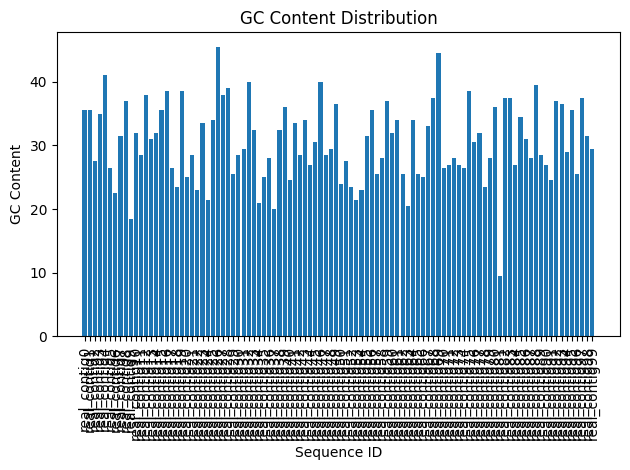

In [ ]:
### This is expect to be done across all sequences not individual sequence, so you can concatenate them to being with.
import matplotlib.pyplot as plt
plt.bar(seq_df["seq_record.id"], seq_df["gc_content"])
plt.xlabel("Sequence ID")
plt.ylabel("GC Content")
plt.title("GC Content Distribution")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


###Question 3-5
On a side project you are being asked to develop part of a pipeline used to validate copy number variants.

To start, download the VCF file from the link below.



In [ ]:
!gdown 1XCTynSQ1g6cidp0oER6IV58hS6Nh1vR-

import pandas

df = pandas.read_csv("Insertions.csv", sep = ",")

Downloading...
From: https://drive.google.com/uc?id=1XCTynSQ1g6cidp0oER6IV58hS6Nh1vR-
To: /content/Insertions.csv
100% 3.53M/3.53M [00:00<00:00, 39.1MB/s]


Import it as a pandas DataFrame.

Note: The VCF file only includes copy number variants.

Question 3: Create three functions that: (+30 points)
- a) Calculates the length of an insertion, this is a freeby there is already a function called len()
- b) Generates primers to amplify the insert.
- c) Calculates the melting temperature of these primers.

NOTE: depending on how you solve this you might need more another function like reverse complement.



In [ ]:
#print(df)
#a) calculate length
def insert_length(insert):
    df['ALT'] = insert
    print(len(insert))

#b) generate FORWARD primer for insert:
def generate_primer(insert):
  cDNA_lib = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
  seq = insert[0:10] #taking the first 10 base pairs
#print(seq)
  seq_complement = "" #create an empty string
  for base in seq:
    seq_complement += cDNA_lib[base] #append each base to empty string
print(seq_complement)

#REVERSE PRIMERS:
def generate_rev_primer(insert):
  cDNA_lib = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
  rev_seq = insert[::-1] # reverses the entire insert
  rev_seq_select = rev_seq[0:10] #taking the first 10 base pairs
  #print(rev_seq_select)
  rev_seq_complement = "" #create an empty string
  for b in rev_seq_select:
        rev_seq_complement += cDNA_lib[b]
  print(rev_seq_complement)

# #FINAL OUTPUT: PRIMERS
# print("Insert =", seq)
# print("Forward primer:", seq_complement)
# print("Reverse primer:", rev_seq_complement)

GAAAAA


In [ ]:
#c) The general formula for melting temp is 4°C*(# G/C nucleotides) + 2°C*(# A/T nucleotides)
def melting_temp(insert):
  GC_count = insert.count('G') + insert.count('C')
  AT_count = insert.count('A') + insert.count('T')
  return (4*GC_count + 2*AT_count)
print(melting_temp(insert))

32


Question 4: Apply your function from (a) to all insertions and store the output in a new column. (+10 points)



In [ ]:
### see hint below.


Question 5: Subset your DataFrame to select insertions larger than 50 bp. Save this subset as a new DataFrame. Apply your functions from (b) and (c) to this new DataFrame and store the results in two new columns. (+20 points)

In [ ]:

##### HINTS.
import pandas

df = pandas.read_csv("human.csv", sep = ",", header=None, names = columns)

### HINT
# you can apply a function to the contents of a colum very easily:
df['COL_NAME'].apply(my_function)

### HINT:
# to select only variants with a single alt allele you can add a filter AF == '1.0'
df['AF'] == '1.0'

### HINT:

### Remember you can save all the sequences in a multifasta in a dictionary like this.
### You can look at an example on your notebook 04 from this class.
seq = {}

with open('multifasta', 'r') as file:
  for line in file.readlines():
    if '>' in line:
      name = line[1::].strip()
      seq[name] = ''
    else:
      stripped = line.strip()
      seq[name] = seq[name] + stripped

### HINT :
## Here are all possible 3-mers
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': '',  'TAG': '',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'TGT': 'C', 'TGC': 'C', 'TGA': '',  'TGG': 'W',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'

### HINT:

#remember you can plot a bar plot like this:

plt.bar(X,Y)
#remmeber you can extract keys and values from a dictionary using the appropriate methods:

my_dict.values()
my_dict.keys()